## LAB 5 - TASK 2 submission. ML 2024-25.
**AUTOENCODERS**


FILL UP THIS BOX WITH YOUR DETAILS

**NAME AND NIP**: 

- Ignacio Pastore Benaim, 920576
- David Padilla Orenga, 946874


The following material is based on the official documentation from Keras and Tensorflow about Autoencoders. For more detailed info or help/hints for some of the questions asked here, you can read:
https://www.tensorflow.org/tutorials/generative/autoencoder
https://blog.keras.io/building-autoencoders-in-keras.html


Copyright 2020 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## 0. Set up

In [40]:
%reset -f

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model

## 1. Train a basic autoencoder
Next you have the code to train a basic autoencoder using the Fashion MNIST  dataset. Each image is 28x28 pixels.
* You can run the current version to see how it works.
* Then, **CHANGE what's necessary** to train it for the CIFAR10 dataset from previous lab (note CIFAR images are 32x32x3, color images, let's **convert to grayscale** with the helper code provided below).

This basic autoencoder only has two Dense layers: an `encoder`, which compresses the images into a 64 dimensional latent vector, and a `decoder`, that reconstructs the original image from the latent space.

The model is trained using `x_train` as both the input and the target. The `encoder` will learn to compress the dataset from the initial dimensions (all the input pixels *streched out* as a single vector) to the latent space (64), and the `decoder` will learn to reconstruct the original images.


This is what you would get with the Fashion-MNIST dataset
![Basic autoencoder results](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/intro_autoencoder_result.png?raw=1)


In [43]:
# LOAD the data

# TO-DO LAB5: modify a few things when you want to train with CIFAR 10

# helper function to convert your images to grayscale
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems to get grayscale
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

# TO-DO: CHANGE THIS CODE TO LOAD CIFAR 10
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# TO-DO: if you want to CONVERT TO GRAYSCALE
# x_train = grayscale(x_train)
# x_test = grayscale(x_test)

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [48]:
# DEFINE the autoencoder model, compile it and train

# **************************************
# TO-DO LAB5: modify what's necesary in this class to make it a valid
# auto-encoder for CIFAR-10 images in grayscale
# **************************************

latent_dim = 64

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      # layers.Dense(1024, activation='sigmoid'),
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
      # layers.Reshape((32, 32))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [49]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [50]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))
print(autoencoder.summary())

Epoch 1/10


2024-11-27 17:10:47.621463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1873/1875 [============================>.] - ETA: 0s - loss: 0.0277

2024-11-27 17:10:53.248813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.0277 - val_loss: 0.0157
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0137 - val_loss: 0.0126
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0122 - val_loss: 0.0121
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0119 - val_loss: 0.0118
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0119 - val_loss: 0.0120
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0119 - val_loss: 0.0123
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0121 - val_loss: 0.0123
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0122 - val_loss: 0.0122
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0124 - val_loss: 0.0127
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0125 - val_los

Now that the model is trained, let's test it by encoding and decoding images from the test set.

In [51]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

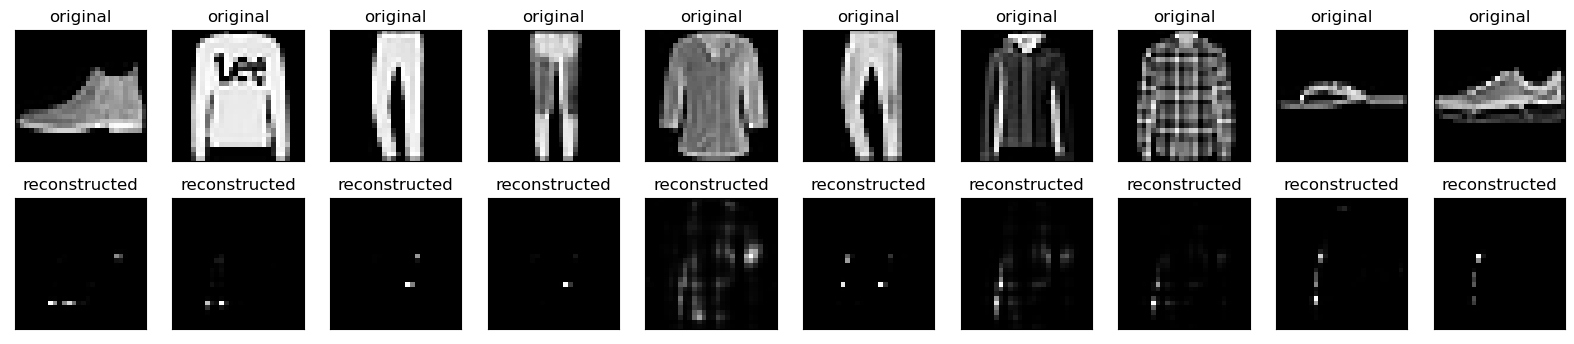

In [52]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  #plt.imshow(x_test[i][:,:,0])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## 2. Now make the autoencoder CONVOLUTIONAL

The basic auto-encoder gets a decent work for such a simple model, but very blurred reconstructiosn. Let's train a convolutional autoencoder using  [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) layers in the `encoder`, and [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) layers in the `decoder`.


**TO-DO LAB5:**
* Use the gray-scale CIFAR-10 images from previous step 1.
* Fill the empty gaps to finish the definition of the Convolutional autoencoder

* Can you adapt the autoencoder to work with color images? Starting from a copy of the current AutoEncoderCONV class, program a new class *AutoEncoderCONV_COLOR*, train it and visualize some examples.

* Can you make the internal encoding of the image to be half size of what it is right now? Starting from a copy of the current AutoEncoderCONV class, program a new class *AutoEncoderCONV_SMALL*, train it and visualize some examples.



In [9]:
# let's reload the data in the right format for the CNN
# If you want to work with color images, re-load in color and do not apply the grayscale conversion for this version
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
# DEFINITION OF THE AUTO-ENCODER

class AutoEncoderCONV(Model):
  def __init__(self):
    super(AutoEncoderCONV, self).__init__()

    # The encoder just consists of 2 convolutional layers.
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])

    # The decoder just consists of 2 convolutional layers
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

#class AutoEncoderCONV_COLOR(Model):

#class AutoEncoderCONV_SMALL(Model):

autoencoder = AutoEncoderCONV()
#autoencoderCOLOR = AutoEncoderCONV_COLOR()
#autoencoderSMALL = AutoEncoderCONV_SMALL()

In [11]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [12]:
# OPTIONAL CODE. NOT REQUIRED. Run it if you want to load the TensorBoard notebook extension and add the callback to the training.
# What it does is to save a log of what's happening to visualize plots to monitor the training

#%load_ext tensorboard

#import datetime, os
#logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

#%tensorboard --logdir logs

#tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
# more details to configure this here:
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [13]:
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

# if you want to visualize tensorboard plots life while it trains, you can try to use this version instead:
#autoencoder.fit(x_train, x_train,
#                epochs=10, shuffle=True,
#                validation_data=(x_test, x_test),
#                callbacks=[tensorboard_callback])

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 45ms/step - loss: 0.0304 - val_loss: 0.0065
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0058

KeyboardInterrupt: 

### **QUESTION 1**:
The encoder reduces the size of the input, and then the decoder upsamples back to 32x32. What's the size of the latent encoding obtained by the network for one of the input 32x32 patches?. What would be the maximum encoding size that would make sense to you? why?

ANSWER: [YOUR ANSWER HERE] (max 3 lines)

In [ ]:
# write any code you may need to help you get this question answers
# (e.g. the summary of all both encoder/decoder is a good way to explore this)


### **QUESTION 2**: Plot a few pairs of images: original vs recovered by the network

**Save one of these plots for each of the three auto-encoders trained** (Required the basic grayscale one. If you want to have full score for this task, you need the other two modifications proposed: color images and/or smaller size of the internal encoding of the image).

In [14]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
# in case you can't believe how good it looks ...
# substract the images to verify they are not just identical by mistake :-)
# print(x_test.shape, encoded_imgs.shape, decoded_imgs.shape)
# aux = x_test[0]-decoded_imgs[0]
# print("Sum of differences per pixel for one example {} ".format(np.sum(np.sum(aux))))

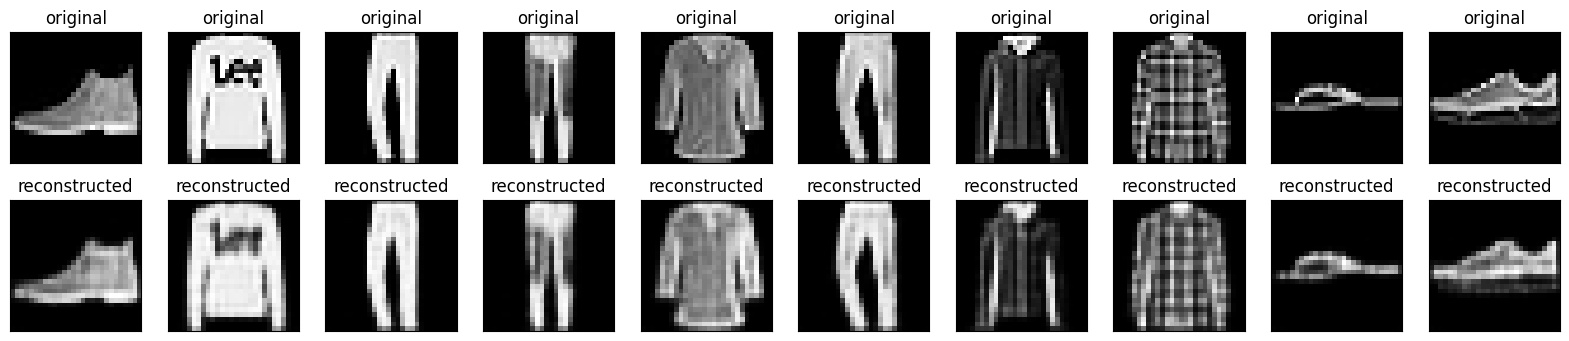

In [15]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

## 3. Anomaly detection using autoencoders

Let's see a different example, with other data types. You will train a deep autoencoder now to detect anomalies on the [ECG5000 dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000). This dataset contains 5,000 [Electrocardiograms](https://en.wikipedia.org/wiki/Electrocardiography), each with 140 data points. We use a simplified version of the dataset, where each example has been labeled either `0` (corresponding to an abnormal rhythm), or `1` (corresponding to a normal rhythm).

*How could you detect anomalies in large datasets using an autoencoder if you wouldn't have annotated data?* (now we will use the labels to verify the quality of what we're getting).

An autoencoder is trained to minimize reconstruction error, so we will train an autoencoder on the normal rhythms only, then use it to reconstruct all the data. The hypothesis is that the abnormal rhythms will have higher reconstruction error, so we can identify a rhythm as an anomaly if the reconstruction error surpasses a fixed threshold.

### Load ECG data

The dataset you will use is based on one from [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).


In [16]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
# visualize a few values:
# dataframe.head()


In [17]:
# Prepare the data

# The last element contains the labels, the rest is the electrocadriogram data
labels = raw_data[:, -1]
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

# Normalize the data to [0,1]
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

# SPLIT the normal (label 1) and abnormal (label 0) rhythms data
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

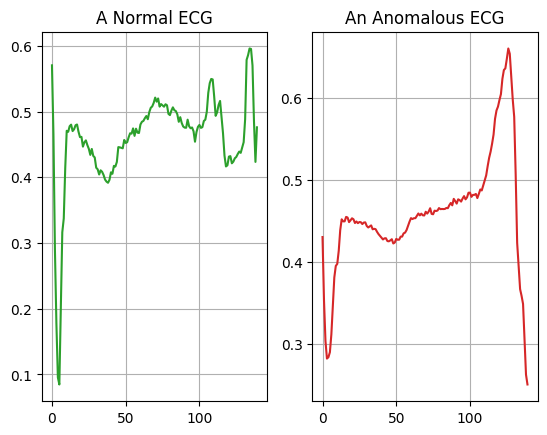

In [18]:
# Plot an example of normal and abnormal ECG
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(140), normal_train_data[0], 'tab:green')
ax1.set_title('A Normal ECG')
ax1.grid()
ax2.plot(np.arange(140), anomalous_train_data[0], 'tab:red')
ax2.set_title("An Anomalous ECG")
ax2.grid()

### Build the model

### **QUESTION 3:** Finish the **implementation** of the auto-encoder.
It should learn a latent **representation of 8 values**. We want the network to have 3 Dense layers as encoder and 3 Dense layers as decoder, with **less than 6000 parameters** in total.

How many parameters has your first dense layer? Can you tell how is that number computed?


ANSWER 1: [YOUR ANSWER HERE] (max 2 lines)

In [ ]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
        #layers.Dense(??, activation="relu"),
        # TO-BE-FILLED
      ])

    self.decoder = tf.keras.Sequential([
        # TO-BE-FILLED
        # leave the last layer with sigmoid activation
        layers.Dense(140, activation="sigmoid")
      ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

autoencoder.compile(optimizer='adam', loss='mae')

Notice that the autoencoder is trained using only the normal ECGs, but it is evaluated using the full **test set**.

In [ ]:
history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=20,
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

autoencoder.encoder.summary()
autoencoder.decoder.summary()
autoencoder.summary()

Let's visualize some results (original ECG, reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error) for normal and abnormal ECG examples

In [ ]:
# normal ECG
encoded_ecgs = autoencoder.encoder(normal_test_data).numpy()
decoded_ecgs = autoencoder.decoder(encoded_ecgs).numpy()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(normal_test_data[0],'b')
ax1.plot(decoded_ecgs[0],'r')
ax1.fill_between(np.arange(140), decoded_ecgs[0], normal_test_data[0], color='lightcoral' )
ax1.set_xlabel("Normal ECG example")

# abnormal ECG
encoded_ecgs = autoencoder.encoder(anomalous_test_data).numpy()
decoded_ecgs = autoencoder.decoder(encoded_ecgs).numpy()

ax2.plot(anomalous_test_data[0],'b')
ax2.plot(decoded_ecgs[0],'r')
ax2.fill_between(np.arange(140), decoded_ecgs[0], anomalous_test_data[0], color='lightcoral' )
ax2.set_xlabel("Abnormal ECG example")
ax2.legend(labels=["Input", "Reconstruction", "Error"])


### Detect anomalies

To *detect* anomalies we'll see if the reconstruction loss is greater than a fixed threshold. In this example, one standard deviation from the mean average error for normal examples in the training set.

Plot the reconstruction error on normal ECGs from the training set and on abnormal ECGs from the test set. Let's also compute the average error on trainin data to establish our *normality* threshold.

In [ ]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold to be considered a normal ECG: ", threshold)

reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(train_loss, bins=50)
ax1.set_xlabel("Error in TRAIN (normal) images")
ax1.set_ylabel("No of examples")

ax2.hist(test_loss, bins=50)
ax2.set_xlabel("Error in TEST (anomalous) images")


Classify an ECG as an anomaly if the reconstruction error is greater than the threshold. By varing this threshold, you can adjust the precision and recall of your classifier.

### **QUESTION 4:**
* In this particular example, you are predicting possible abnormal ECG. What would you prefer to maximize? Precision or Recall? Explain why.
* Besides, in order to analyze in more detail the results here, estimate how much normal ECG has been predicted as abnormal and viceversa? (if you need additional code, add it to the final code cell)

ANSWER 2: [YOUR-ANSWER-HERE] (max 4 lines)

In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {0:.3f}".format(accuracy_score(labels, preds)))
  print("Precision = {0:.3f}".format(precision_score(labels, preds)))
  print("Recall = {0:.3f}".format(recall_score(labels, preds)))

In [ ]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)